<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>Mini Jupyter tutorial<br><br>To run each cell, click the cell and press <kbd>Run</kbd> from the menu bar. This will run any Python code or display any text within the selected cell before highlighting the next cell down. There are two types of cell: A <i>text cell</i> of type <kbd>Markdown</kbd> or <kbd>Heading</kbd> and a <i>code cell</i> of type <kbd>Code</kbd> identifiable with the <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>. The type of cell is also identifiable from the dropdown menu in the above menu bar to the right of <kbd>Run</kbd>. Any visual results produced by the code (text/figures) are displayed directly below that cell. Press <kbd>Run</kbd> again until you reach the end of the notebook or alternatively click <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should the Jupyter notebook crash for any reason, restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

# Tutorial 1.6: Metabolomics of athlete performance at high altitude: A spring-embedded network

<p style="text-align: justify">
<br>
This tutorial covers the necessary steps for producting both a static and interactive spring-embedded network plots (single and multi-block) using data from a study on the impact that high altitude has on the performanance of athletes.
</p>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red', size=4>Note: If visualisng using a JavaScript pop-up window you will need to allow pop-ups from your browser for the domain you're running from (localhost or mybinder.org).
</div>   

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools beyond the in-built Python modules.
<br></p>
<br>
All the code embedded in this notebook is written using Python (<a href="http://www.python.org">python.org</a>) and JavaScript (<a href="https://www.javascript.com/">javascript.com</a>) and are built upon popular open source packages such as Networkx (<a href="https://networkx.github.io/">networkx.github.io</a>), NumPy (<a href="https://numpy.org/">numpy.org</a>), SciPy (<a href="https://www.scipy.org/">scipy.org</a>), Matplotlib (<a href="https://matplotlib.org/">matplotlib.org</a>), statsmodels (<a href="www.statsmodels.org/">statsmodels.org</a>), Scikit-learn (<a href="scikit-learn.org/">scikit-learn.org</a>), scikits.bootstrap (<a href="github.com/cgevans/scikits-bootstrap">github.com/cgevans/scikits-bootstrap</a>), Pandas (<a href="https://pandas.pydata.org/">pandas.pydata.org</a>) and D3 JavaScript (<a href="https://d3js.org/">d3js.org</a>).
    
<em>Note:</em> a tutorial focusing on the python programming language is beyond the scope of this notebook. To learn how to program in Python with Jupyter Notebook please refer to: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>.

In [1]:
import os
   
home = os.getcwd() + "/"

import numpy as np
import pandas as pd
from IPython.display import Javascript, display, IFrame
import multivis

print('All packages successfully loaded')

%load_ext autoreload
%autoreload 2

All packages successfully loaded


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

<h2 style="text-align: justify">2. Load Data and Peak Table</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> sheets from an Excel file using <code>loadData()</code>. When this is complete, you should see confirmation that Peak (the Peak worksheet) and Data (the Data worksheet) tables have been loaded.<br>

This dataset has previously been published in (<a href="https://physoc.onlinelibrary.wiley.com/doi/full/10.1113/EP087159">Lawler et al. (2018)</a>) in <i>Experimental Physiology</i> and has been put into a standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format.
</p>

Please inspect the <a href="Altitude_Data.xlsx">Altitude_Data.xlsx </a>Excel file before using it in this tutorial to understand its structure. To change the dataset to be loaded into the notebook replace <code>filename = 'Altitude_Data.xlsx'</code> with another file with the same <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format as <a href="Altitude_Data.xlsx">Altitude_Data.xlsx</a>, and then rerun the workflow.

</div></div>

In [2]:
file = 'Altitude_Data.xlsx'

DataTable,PeakTable = multivis.utils.loadData(home + file, DataSheet='Data', PeakSheet='Peak')

Loading table: Peak
Loading table: Data
TOTAL SAMPLES: 29 TOTAL PEAKS: 32
Done!


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data Table

Check the imported Data table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTable)</span><br>
</div>

In [3]:
display(DataTable)

,Idx,Class,SampleID,M1,M2,M3,M4,M5,M6,M7,...,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32
1,1,Day1,ID#8,11869.885789,7928.191086,10435.615600,24274.490844,1.652528e+06,5.527597e+05,3302.626974,...,8821.868440,45452.021662,8.422674e+05,35812.954717,11908.058199,58304.192636,76229.516925,698.829269,6.152166e+06,3.011384e+05
2,2,Day3,ID#9,6091.032382,336302.294432,7583.153313,15992.455361,1.014382e+06,5.398275e+05,2561.396590,...,7070.409466,23748.717737,5.969310e+05,43209.005653,1614.750726,17107.605509,33792.399242,5219.808748,3.844697e+06,3.876507e+05
3,3,Day14,ID#10,8304.840762,91992.628406,15463.843074,17243.287685,1.261087e+06,6.358351e+05,2579.520637,...,6189.891266,62171.092488,4.617908e+05,19891.976258,5787.252806,21196.689803,49518.409732,6917.767103,3.642466e+06,3.085592e+06
4,4,Day1,ID#4,5679.245738,103604.360972,11726.584477,18997.946320,1.730119e+06,8.018186e+05,1862.338814,...,14710.768208,29470.036797,6.338633e+05,54690.964915,6119.355667,34562.628959,25722.056666,82857.001884,6.507678e+06,4.544997e+05
5,5,Day3,ID#3,7927.719880,377994.409342,37252.855940,23070.362098,2.172443e+06,8.122617e+05,2368.612424,...,8373.694858,70177.184112,5.764836e+05,119391.571698,5831.690401,11314.289830,27222.497589,8780.422655,5.452713e+06,3.675841e+05
6,6,Day14,ID#3,4074.580486,9234.118904,2883.602638,27252.577493,1.694014e+06,3.198403e+05,2436.745786,...,17175.921137,43648.210575,3.669026e+05,41311.727090,20909.038093,14625.381528,61184.204465,2386.211484,3.958768e+06,7.036890e+05
7,7,Day3,ID#2,7120.333141,98285.350473,14214.077514,24997.653286,1.421475e+06,6.981114e+05,3576.187472,...,11930.411039,33482.365703,7.695907e+05,17285.765486,4002.855161,18389.688133,54971.306524,1266.178495,4.396494e+06,5.522302e+05
8,8,Day3,ID#4,8103.250066,31683.902081,8928.894882,20545.072813,1.655281e+06,3.886826e+05,3023.746753,...,9760.323565,24682.407167,6.951134e+05,33854.620792,5749.788807,13098.908274,32455.790304,13672.154888,3.771656e+06,1.186001e+06
9,9,Day14,ID#8,8273.693156,382598.960254,4154.972730,22212.782829,1.891639e+06,8.915732e+05,2310.807344,...,11142.048186,50927.179351,6.828179e+05,169428.675064,5179.873860,14255.030832,63933.849462,2019.496191,3.703559e+06,4.964483e+05
10,10,Day3,ID#10,6690.535074,98946.804580,5388.740427,14757.880513,1.370226e+06,6.644797e+05,2577.400534,...,10905.284099,30077.046114,6.620947e+05,44494.246759,5019.971982,9310.215496,32246.148489,455.958833,3.207303e+06,3.559986e+05


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table

Check the imported Peak table  simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTable)</span><br>
</div>

In [4]:
display(PeakTable)

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,Dratio
1,1,M1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,2.887221
2,2,M2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,24.314863
3,3,M3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,3.216742
4,4,M4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,4.025602
5,5,M5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,2.417115
6,6,M6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,2.332534
7,7,M7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,1.564374
8,8,M8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,7.463177
9,9,M9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,3.480650
10,10,M10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,4.942172


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 3. Statistical analysis

Statistical analysis is important to identify any features or samples which may be outliers. 
It is also important to identify whether the data is normally distributed prior to any further analysis such as which scaling methods to use or the type of correlation analysis to use. Whether the data is normally distrubuted or not can determine the most suitable correlation function to use. For example the parametric method Pearson's correlation should be used for normally distributed data, whereas the non-parametric method Spearman's correlation is suitable for non-normally distributed data.

Statistical analysis can also provide additional univariate information for futher down-stream visualisations, such as one-way Anova p-values and PCA loadings for each feature to be represented for each of the nodes in the spring-embedded network plot or other visualisation methods. In this way the network visualisation can considered a multivariate clustering method.    
</div>

In [5]:
stats = multivis.utils.statistics(PeakTable, DataTable)

stats.help()

Generate a table of parametric or non-parametric statistics and merges them with the Peak Table (node table).
        Initial_Parameters
            ----------
            peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
            datatable : Pandas dataframe matrix containing values for statistical analysis

        Methods
            -------
            set_params : Set parameters -
                parametric: Perform parametric statistical analysis, assuming the data is normally distributed (default: True)
                log_data: Perform a log ('natural', base 2 or base 10) on all data prior to statistical analysis (default: (False, 2))
                scale_data: Scale the data ('standard' (centers to the mean and scales to unit variance), 'minmax' (scales between 0 and 1), 'maxabs' (scales to the absolute maximum value), 'robust' (centers to the median and scales to between 25th and 75th quantile range) (default: (True, 'standard'))
        

In [6]:
params = dict({'parametric': True
              , 'log_data': (True, 2)
              , 'scale_data': (True, 'standard')
              , 'impute_data': (False, 3)
              , 'group_column_name': 'Class'
              , 'control_group_name': 'Day1'
              , 'group_alpha_CI': 0.05
              , 'fold_change_alpha_CI': 0.05
              , 'pca_alpha_CI': 0.05
              , 'total_missing': False
              , 'group_missing': False
              , 'pca_loadings': True
              , 'normality_test': True
              , 'group_normality_test': False
              , 'group_mean_CI': True
              , 'group_median_CI': False
              , 'mean_fold_change': True
              , 'median_fold_change': False
              , 'kruskal_wallis_test': False
              , 'levene_twoGroup': False
              , 'levene_allGroup': False
              , 'oneway_Anova_test': False
              , 'ttest_oneGroup': False
              , 'ttest_twoGroup': True
              , 'mann_whitney_u_test': False})

stats.set_params(**params)

PeakTableStats = stats.calculate()

/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:832: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  grpMean_CI = bootstrap.ci(data=group, statfunction=np.nanmean, n_samples=500, alpha=grpAlphaCI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:262: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  CIs = bootstrap.ci(data=groupList, statfunction=meanFold, n_samples=500, alpha=fold_change_alpha_CI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:832: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  grpMean_CI = bootstrap.ci(data=group, statfunction=np.nanmean, n_samples=500, alpha=grpAlphaCI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/

/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:262: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  CIs = bootstrap.ci(data=groupList, statfunction=meanFold, n_samples=500, alpha=fold_change_alpha_CI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:832: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  grpMean_CI = bootstrap.ci(data=group, statfunction=np.nanmean, n_samples=500, alpha=grpAlphaCI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:832: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  grpMean_CI = bootstrap.ci(data=group, statfunction=np.nanmean, n_samples=500, alpha=grpAlphaCI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/s

/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:262: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  CIs = bootstrap.ci(data=groupList, statfunction=meanFold, n_samples=500, alpha=fold_change_alpha_CI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:832: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  grpMean_CI = bootstrap.ci(data=group, statfunction=np.nanmean, n_samples=500, alpha=grpAlphaCI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:832: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  grpMean_CI = bootstrap.ci(data=group, statfunction=np.nanmean, n_samples=500, alpha=grpAlphaCI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/s

/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:262: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  CIs = bootstrap.ci(data=groupList, statfunction=meanFold, n_samples=500, alpha=fold_change_alpha_CI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:832: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  grpMean_CI = bootstrap.ci(data=group, statfunction=np.nanmean, n_samples=500, alpha=grpAlphaCI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.11/site-packages/multivis/utils/statistics.py:262: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  CIs = bootstrap.ci(data=groupList, statfunction=meanFold, n_samples=500, alpha=fold_change_alpha_CI)
/Users/brettchapman/anaconda3/envs/multivis_tutorials_test/lib/python3.

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table with statistical information: Shapiro-Wilk's pvalue, T-test, mean concentration, mean fold change and PCA loadings

Check the imported Peak table with statistical information, by simply calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTableStats)</span><br>
</div>

In [7]:
display(PeakTableStats)

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,...,TTEST-twoGroup_BHFDR_qvalue_Day14,TTEST-twoGroup_BHFDR_qvalue_Day3,PC1,PC2,PC1_lower,PC1_upper,PC1_sig,PC2_lower,PC2_upper,PC2_sig
0,0,M1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,...,0.718698,0.387815,0.172449,-0.075246,0.000207,0.368613,True,-0.361367,0.123333,False
1,1,M2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,...,0.718698,0.751933,0.166588,0.247957,-0.098375,0.372148,False,0.053753,0.470684,True
2,2,M3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,...,0.718698,0.999857,0.193745,-0.070164,0.041230,0.347238,True,-0.347089,0.135593,False
3,3,M4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,...,0.718698,0.387815,-0.035571,-0.240657,-0.229780,0.258227,False,-0.488378,-0.126113,True
4,4,M5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,...,0.718698,0.830954,-0.076491,-0.160579,-0.543772,0.031221,False,-0.537211,-0.011169,True
5,5,M6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,...,0.718698,0.999857,0.234512,0.009089,0.136246,0.401471,True,-0.263095,0.245292,False
6,6,M7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,...,0.718698,0.999857,-0.056805,-0.250191,-0.265585,0.229715,False,-0.442226,-0.142464,True
7,7,M8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,...,0.718698,0.999857,0.346193,-0.049402,0.325064,0.403482,True,-0.316409,0.220735,False
8,8,M9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,...,0.718698,0.999857,0.244783,-0.125493,0.065579,0.412654,True,-0.406331,0.184624,False
9,9,M10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,...,0.718698,0.751933,0.111963,-0.291400,-0.181032,0.378579,False,-0.449427,-0.148443,True


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Determine if the data is normally distributed

If the majority of the data shows a Shapiro-Wilks pvalue > 0.05 the data is normally distributed and parametric statistical analysis is recommended, however if the pvalue is < 0.05 then the data is non-normally distributed and non-parametric analysis methods are recommended.
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features normally distributed

In [8]:
display(len(PeakTableStats.query('Shapiro_pvalue > 0.05')))

24

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features non-normally distributed

In [9]:
display(len(PeakTableStats.query('Shapiro_pvalue < 0.05')))

8

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Normality conclusion

The data is normally distributed and therefore parametric analysis (e.g. one-way Anova, T-test, Pearson's correlation etc) is recommended.

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 4. Log transform prior to Pearson's correlation analysis

 Transformation can be done with a log to approximate a normal distribution, commonly used for biological data types, however there are other types such as square, square root, cube root or reciprocal transformation, which may be suitable for other types of data. Scaling is highly dependent on the values found in the dataset. If the dataset contains a number of values which are very large compared to the majority of other values, then this may skew the data in favour of those values and consequently bias the results. Scaling is performed so that all values are comparable. Scaling methods such as 'standard', which centers around a mean of 0 and scales to a standard deviation of 1 (unit variance) is good if you want the data to approximate a normal distribution for parametric univariate statistical analysis, however it is prone to the effects of outliers and larger standard deviations will appear to have a bigger affect (maximise variation) which is suitable for PCA. Other methods such as 'minmax' scales the data between a minimum and maximum value (usually 0 and 1), and 'maxabs' which scales around the maximum absolute value. Both 'minmax' and 'maxabs' can perform similarly to each other if the data is positive and both maintains the shape of the distribution, unlike the 'standard' method. The 'robust' method centers around the median and scales to a lower and upper quantile range, and is robust to the presence of outliers. Pearson correlation, a parametric method, can later be performed where a log is necessary to normally distribute the data. However, if a non-parametric method is used, such as Spearman or Kendall's Tau, then a log is not necessary. Additionally, where a correlation is used no scaling is necessary after log transformation, as correlation analysis does not require scaling, as covariance is measured between individual values in the bivariate correlation analysis, unlike with PCA in tutorial 1.1, which performs multivariate analysis, measuring the variance across all values. However, if another similarity metric were to be used in place of correlation, such as Euclidean distance, then scaling may be a necessary step to take.

In this example, as Pearson's correlation is later being performed a log is necessary.
</div>

In [10]:
peaklist = PeakTableStats['Name']                       # Set peaklist to the metabolite names in the DataTableClean
X = DataTable[peaklist]                                 # Extract X matrix from DataTable using peaklist
Xlog = np.log2(X)                                       # Log transform (base-2)
#Xscale = multivis.utils.scaler(Xlog, type='standard')  # Center to a mean of 0 and scale to unit variance
#Xscale = multivis.utils.imputeData(X, k=3)             # Impute remaining missing values using KNN impute with k=3

DataTableLogged = pd.merge(DataTable.T[~DataTable.T.index.isin(PeakTable['Name'])].T.reset_index(drop=True), pd.DataFrame(Xlog, columns=peaklist).reset_index(drop=True), left_index=True, right_index=True)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

<h1 style="text-align: justify">Single-block spring-embedded network</h1>
   
The single-block approach identifies associations between features across all different groups/classes in the data which makes adding univariate statistics such as median fold changes difficult to interpret when you can not compare the fold changes across the different groups/classes simultaneiously in the same visualisation. This approach allows for a more simplistic view of the data focussing on the associations between features (e.g. correlations), but has the benefit of uncluttering the final visualisation.

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 5. Correlation analysis (single-block)

Correlation is a form of similarity and measures the strength of the linear relationship between two variables. Pearson's correlation, a form of parametric correlation analysis, is described mathematically by dividing the joint variability or covariance of two variables by the product of their standard deviations (see Eq1). Other forms of correlation measure the monotonic relationships and are non-parametric, such as Spearman’s rank correlation and Kendall Tau's correlation. The following correlation analysis, allows for Pearson, Spearman or Kendall Tau's correlation analysis.

\begin{equation*}
r = \frac{Cov(X,Y)}{SD(X).SD(Y)}
\end{equation*}
<center>Eq1: Pearson’s correlation coefficient</center>

</div>

In [11]:
correlationType = "pearson" #"spearman"; "kendalltau"

X = DataTableLogged[PeakTableStats['Name']]

SingleBlockScores,SingleBlockPvalues = multivis.utils.corrAnalysis(X, correlationType)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 96.04it/s]


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 6.  Generate Network (single-block)

The similarities/distances are filtered and put in a dataframe of edges, where nodes represent features and edges represent similarity/distance scores (e.g. correlation coefficients), with included node names, labels, colours, and pvalues. The dataframe of edges is then passed into a NetworkX graph. Generation of the network is not limited to interepreting matrices of correlation coefficients, but can take any values as long as the matrix contains features on the x-axis and groups/categories/samples on the y-axis. Although it is possible to produce a network plot with both positive and negative correlations, it is advisable to generate them separately to assist in identifying any patterns in the data, as adding both network types can sometimes produce a cluttered and confusing network.

</div>

In [12]:
single_block_network = multivis.Network(peaktable=PeakTableStats, datatable=SingleBlockScores, pvalues=SingleBlockPvalues)

single_block_network.help()

Builds nodes and edges, with added NetworkX functionality. Inherits from Edge.

        Initial_Parameters
        ----------
        peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
        datatable : Pandas dataframe matrix containing scores
        pvalues : Pandas dataframe matrix containing score/similarity pvalues (if available)

        Methods
        -------
        set_params : Set parameters -
            filter_type: The value type to filter the data on (default: 'pvalue')
            hard_threshold: Value to filter the data on (default: 0.005)
            link_type: The value type to represent links in the network (default: 'score')
            withinBlocks: Include scores within blocks if building multi-block network (default: False)
            sign: The sign of the score/similarity to filter on ('pos', 'neg' or 'both') (default: 'both')

        help : Print this help text

        build : Builds nodes, edges and NetworkX graph.
     

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Generate positive correlated NetworkX graph
</div>

In [13]:
single_block_params = dict({'filter_type': 'pvalue'    #The filter type to use for the network ('Pvalue' or 'Score')
                           , 'hard_threshold': 0.1     #The hard threshold to apply to the network
                           , 'link_type': 'score'      #The link type to use within the network ('score' or 'pvalue')
                           , 'withinBlocks': False     #Include scores within blocks if building multi-block network
                           , 'sign': 'pos'})           #The sign of the scores ('pos', 'neg' or 'both')

single_block_network.set_params(**single_block_params)

single_block_network.build()

positive_g = single_block_network.getNetworkx()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Generate negative correlated NetworkX graph
</div>

In [14]:
single_block_params = dict({'filter_type': 'pvalue'    #The filter type to use for the network ('Pvalue' or 'Score')
                           , 'hard_threshold': 0.1     #The hard threshold to apply to the network
                           , 'link_type': 'score'      #The link type to use within the network ('score' or 'pvalue')
                           , 'withinBlocks': False     #Include scores within blocks if building multi-block network
                           , 'sign': 'neg'})           #The sign of the scores ('pos', 'neg' or 'both')

single_block_network.set_params(**single_block_params)

single_block_network.build()

negative_g = single_block_network.getNetworkx()

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 7.  Plot a static NetworkX graph (single-block)

A NetworkX graph is used to generate a static network plot with a user chosen NetworkX layout. The default layout is a spring-embedded network plot.

</div>

In [15]:
positive_networkPlot = multivis.plotNetwork(positive_g)

positive_networkPlot.help()

Produces a static spring-embedded network from a NetworkX graph.

        Initial_Parameters
        ----------
        g : NetworkX graph.

        Methods
        -------
        set_params : Set parameters -
            imageFileName: The image file name to save to (default: 'networkPlot.jpg')
            edgeLabels: Setting to 'True' labels all edges with the similarity score (default: True)
            saveImage: Setting to 'True' will save the image to file (default: True)
            layout: Set the NetworkX layout type ('circular', 'kamada_kawai', 'random', 'spring', 'spectral') (default: 'spring')
            transparent: Setting to 'True' will make the background transparent (default: False)
            dpi: The number of Dots Per Inch (DPI) for the image (default: 200)
            figSize: The figure size as a tuple (width,height) (default: (30,20))
            node_cmap: The CMAP colour palette to use for nodes (default: 'brg')
            colorScale: The scale to use for c

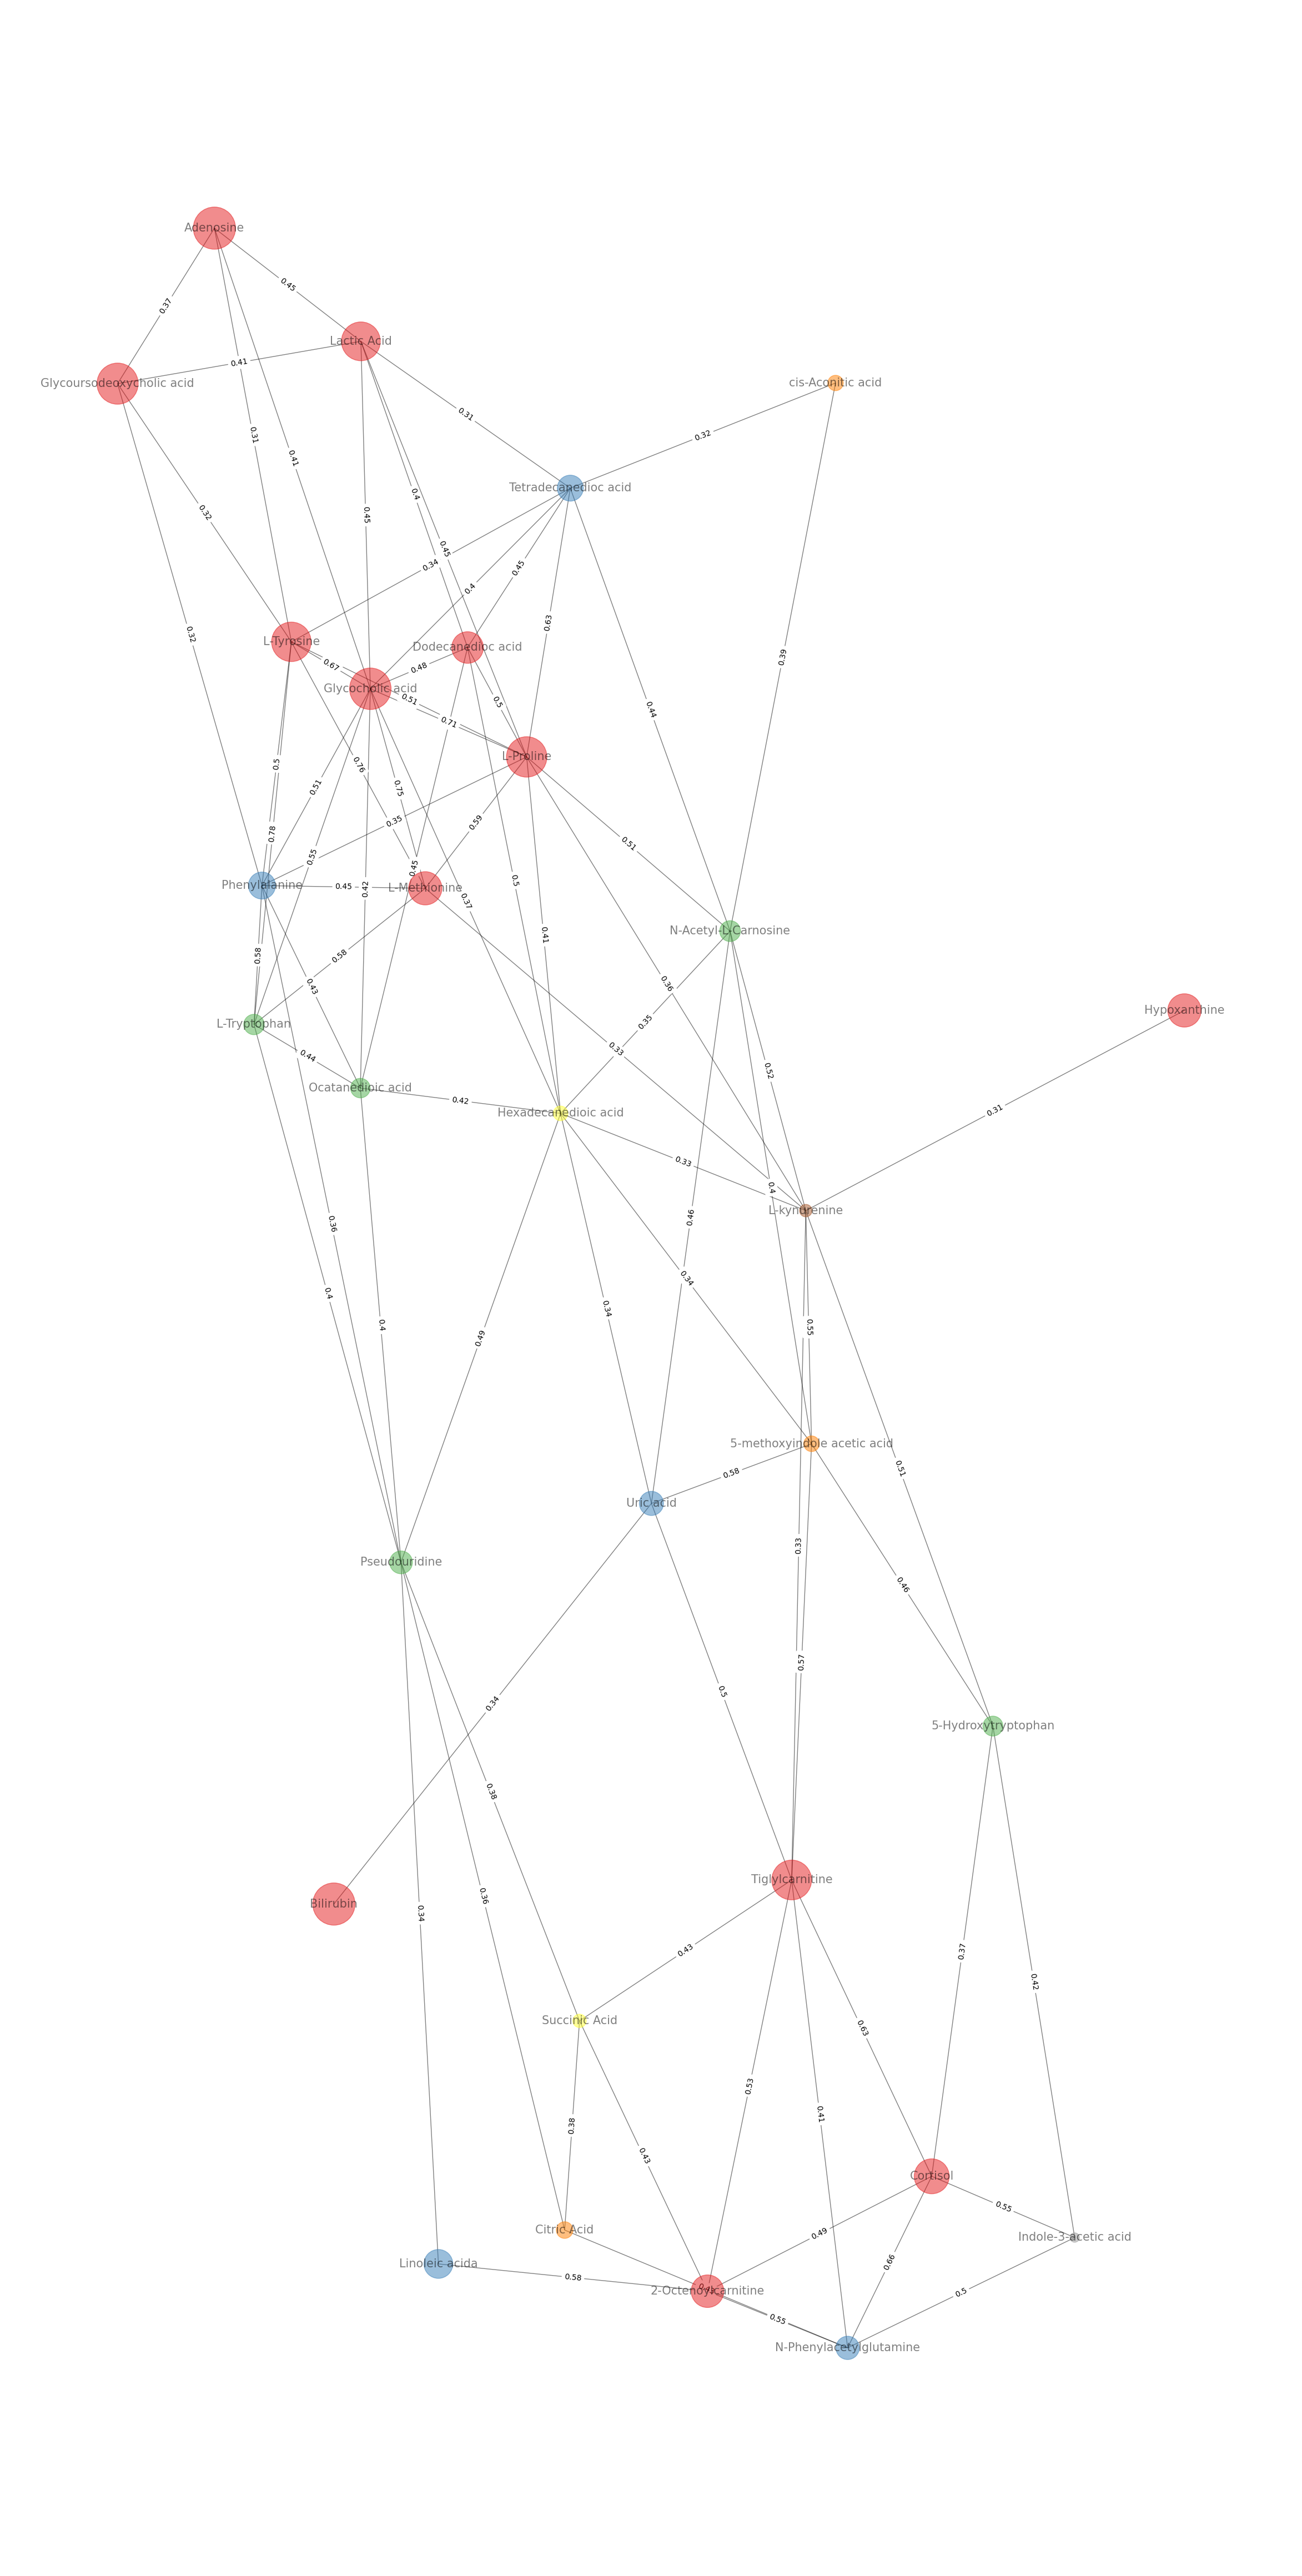

In [16]:
node_params = dict({'node_cmap': 'Set1'                       #The colour map of the nodes
                    , 'node_color_column': 'pvalue'           #If node_color_column set to colour values it overides the use of node_cmap  
                    , 'colorScale': 'linear'                  #The scale to use for colouring the nodes
                    , 'sizing_column': 'pvalue'               #The column from the Peak Table to use for sizing the nodes
                    , 'sizeScale': 'reverse_linear'           #The scale to use for sizing the nodes
                    , 'size_range': (150,3000)                #The size range for the nodes
                    , 'alpha': 0.5                            #The alpha opacity value for the nodes
                    , 'nodeLabels': True                      #If setting to 'True' labels the nodes
                    , 'fontSize': 15                          #The font size of the labels on the nodes
                    , 'keepSingletons': False})               #If setting to 'True' keeps any single nodes not linked by edges

filter_params = dict({'filter_column': 'pvalue'               #The column to filter the data on
                      , 'threshold':  1.0                     #The threshold to use when filtering the data
                      , 'operator': '>'                       #The operator to apply when filtering the data
                      , 'sign': "both"})                       #The sign of the similarities ('pos', 'neg' or 'both')

general_params = dict({'imageFileName': 'springNetwork_positive_single-block_altitude_study.png'   #File name to save image to
                       , 'edgeLabels': True                   #If setting to 'True' labels the edges with the similarity score
                       , 'saveImage': True                    #If setting to 'True' saves the image
                       , 'layout': 'spring'                   #The NetworkX layout to apply ('circular', 'kamada_kawai', 'random', 'spring', 'spectral')
                       , 'transparent': False                 #If 'True' sets the background to transparent
                       , 'dpi': 200                           #The DPI of the image
                       , 'figSize': (30,60)})                 #Figure size (width,height)

positive_networkPlot.set_params(**general_params,**node_params,**filter_params)

positive_networkPlot.build()

In [17]:
negative_networkPlot = multivis.plotNetwork(negative_g)

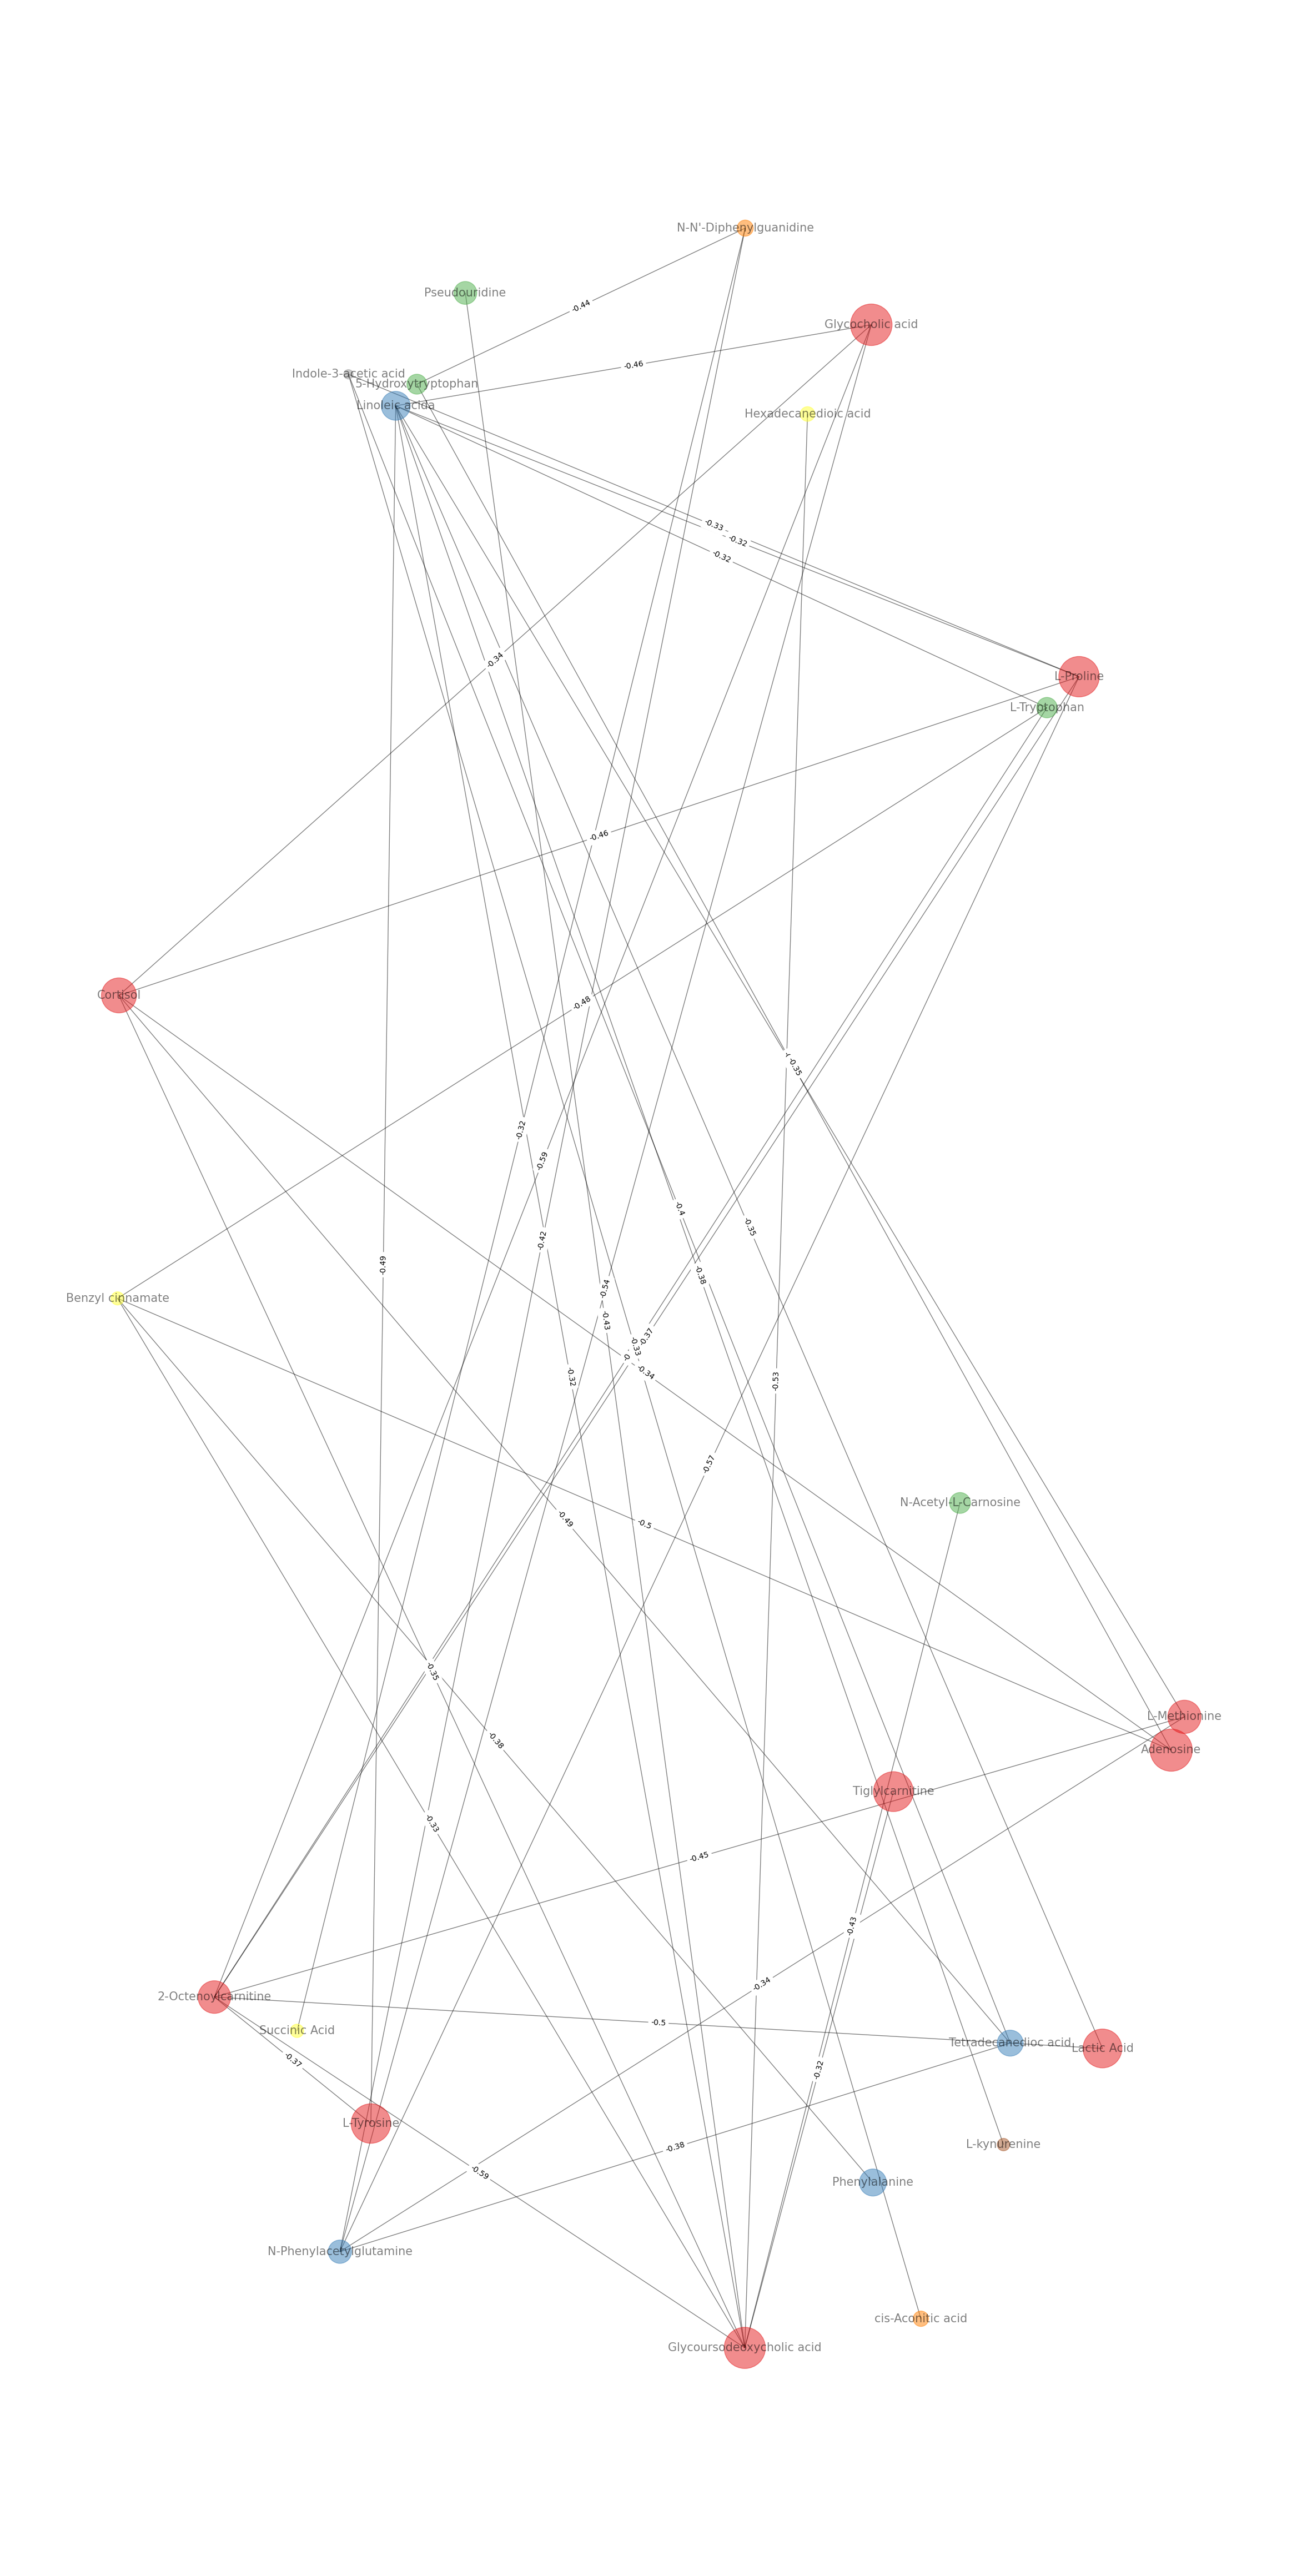

In [18]:
node_params = dict({'node_cmap': 'Set1'                       #The colour map of the nodes
                    , 'node_color_column': 'pvalue'           #If node_color_column set to colour values it overides the use of node_cmap  
                    , 'colorScale': 'linear'                  #The scale to use for colouring the nodes
                    , 'sizing_column': 'pvalue'               #The column from the Peak Table to use for sizing the nodes
                    , 'sizeScale': 'reverse_linear'           #The scale to use for sizing the nodes
                    , 'size_range': (150,3000)                #The size range for the nodes
                    , 'alpha': 0.5                            #The alpha opacity value for the nodes
                    , 'nodeLabels': True                      #If setting to 'True' labels the nodes
                    , 'fontSize': 15                          #The font size of the labels on the nodes
                    , 'keepSingletons': False})               #If setting to 'True' keeps any single nodes not linked by edges

filter_params = dict({'filter_column': 'pvalue'               #The column to filter the data on
                      , 'threshold':  1.0                     #The threshold to use when filtering the data
                      , 'operator': '>'                       #The operator to apply when filtering the data
                      , 'sign': "both"})                       #The sign of the similarities ('pos', 'neg' or 'both')

general_params = dict({'imageFileName': 'springNetwork_negative_single-block_altitude_study.png'   #File name to save image to
                       , 'edgeLabels': True                   #If setting to 'True' labels the edges with the similarity score
                       , 'saveImage': True                    #If setting to 'True' saves the image
                       , 'layout': 'spring'                   #The NetworkX layout to apply ('circular', 'kamada_kawai', 'random', 'spring', 'spectral')
                       , 'transparent': False                 #If 'True' sets the background to transparent
                       , 'dpi': 200                           #The DPI of the image
                       , 'figSize': (30,60)})                 #Figure size (width,height)

negative_networkPlot.set_params(**general_params,**node_params,**filter_params)

negative_networkPlot.build()

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 8.  Plot an interactive Spring-embedded Network (single-block)

The NetworkX graph is then passed into D3 JavaScript to generate an interactive spring-embedded network plot for interactive visualisation. The spring-embedded network plot is implemented within an undirected graph, where each node represents a feature and the spring constant of each edge between nodes represents some associated value such as correlation coefficient. When the tension on the graph is allowed to relax and put in a low energy configuration, the springs push the nodes to their furthest allowed distance from each other in the graph layout. Where there are edges with higher values the spring tightens bringing nodes closer together and where there are lower values the spring loosens and stretches. In this case the spring-embeeded network becomes multivariate, forming a multivariate cluster analysis method, where nodes clustered together are more positively associated together and nodes further apart are considered more negatively associated. The inclusion of univariate statistical analysis outputs in the form of p-values and other univariate statistics provide another layer of information by illustrating such information as different sizes or colours of nodes. Generation of the spring-embedded network is not limited to interepreting matrices of correlation coefficients, but can take any values as long as the matrix contains features on the x-axis and groups/categories/samples on the y-axis. The number of counts of features assigned to different categories can also be used, for example different genomes on the x-axis vs identified protein family domains on the y-axis or using an every day example the number of times individuals visited destinations. All this data can be visualised as a network to identify patterns and previously un-identified associations.

Note: The visualisation will automatically open in another tab, unless running in Binder (See step 9).

</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Generate positive correlated interactive spring-embedded network
</div>

In [19]:
positive_single_block_springNetwork = multivis.springNetwork(positive_g)

positive_single_block_springNetwork.help()

Produces an interactive spring-embedded network in D3.js, from a NetworkX graph.

        Initial_Parameters
        ----------
        g : NetworkX graph.

        Methods
        -------
        set_params : Set parameters -
            node_size_scale: dictionary(Peak Table column name as index: dictionary('scale': ("linear", "reverse_linear", "log", "reverse_log", "square", "reverse_square", "area", "reverse_area", "volume", "reverse_volume", "ordinal", "reverse_ordinal")
                                                                                    , 'range': a number array of length 2 - minimum size to maximum size)) (default: sizes all nodes to 10 with no dropdown menu)
            node_color_scale: dictionary(Peak Table column name as index: dictionary('scale': ("linear", "reverse_linear", "log", "reverse_log", "square", "reverse_square", "area", "reverse_area", "volume", "reverse_volume", "ordinal", "reverse_ordinal") (default: colours all nodes to 'black')
            ht

In [20]:
positive_single_block_node_params = dict({'node_text_size': 15                      #The font size of the labels on the nodes
                    , 'fix_nodes': True                       #If setting to 'True' nodes fix in place after manually moving them. Double click them to release.
                    , 'displayLabel': True                    #If setting to 'True' the nodes are labelled with 'Label', otherwise they're labelled with 'Name'
                    , 'node_data': ['Name', 'Label', 'Mode', 'mz', 'rt', 'F', 'pvalue', 'pFDR', 'RSD', 'Dratio', 'PC1', 'PC2', 'PC1_sig', 'PC2_sig']}) #The node data from the Peak Table to display on hover of each node and to colour the nodes by from the dropdown menu

positive_single_block_link_params = dict({'link_type': single_block_network.getLinkType()        #The link type to use in the spring-embedded plot (value can be retrived from original generated network with the getLinkType() function) 
                    , 'link_width': 0.5                       #The link width to set between nodes
                    , 'pos_score_color': 'red'                #Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                    , 'neg_score_color': 'black'})            #Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.

positive_single_block_general_params = dict({'html_file': 'springNetwork_positive_single-block_altitude_study.html'      #The HTML file name to save to
                       , 'backgroundColor': 'white'           #Background color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                       , 'foregroundColor': 'black'           #Foreground color works with both HTML/CSS name, hex code, and (R,G,B) tuples.                       
                       , 'chargeStrength': -120               #The charge strength of the spring-embedded network (force between nodes)
                       , 'groupByBlock': False                #If setting to 'True' will  group nodes by 'Block' if present in the data
                       , 'groupFociStrength': 0.2             #The strength of foci for each group
                       , 'intraGroupStrength': 0.01           #The strength between each group
                       , 'groupLayoutTemplate': 'treemap'})   #Set the layout template to use for grouping

# Dictionary of node size "scale" and "range" values for chosen columns from the Peak Table.
#The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square"
#, "reverse_square", "area", "reverse_area", "volume", "reverse_volume" or "ordinal"
positive_single_block_node_size_scale = dict({'pvalue': {'scale': 'reverse_log', 'range': [5,30]}
                        , 'Mode': {'scale': 'ordinal', 'range': [10,25]}
                        , 'mz': {'scale': 'linear', 'range': [5,30]}
                        , 'rt': {'scale': 'log', 'range': [10,50]}                        
                        , 'pFDR': {'scale': 'reverse_linear', 'range': [10,30]}
                        , 'F': {'scale': 'log', 'range': [10,50]}
                        , 'RSD': {'scale': 'reverse_log', 'range': [5,20]}
                        , 'Dratio': {'scale': 'log', 'range': [5,20]}                        
                        , 'PC1': {'scale': 'linear', 'range': [5,30]}
                        , 'PC2': {'scale': 'linear', 'range': [5,30]}
                        , 'PC1_sig': {'scale': 'ordinal', 'range': [5,30]}
                        , 'PC2_sig': {'scale': 'reverse_ordinal', 'range': [5,30]}});

# Dictionary of node colour "scale" values for chosen columns from the Peak Table.
# The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square"
#, "reverse_square", "area", "reverse_area", "volume", "reverse_volume" or "ordinal"
positive_single_block_node_color_scale = dict({'pvalue': {'scale': 'reverse_log'}
                        , 'Mode': {'scale': 'reverse_ordinal'}
                        , 'mz': {'scale': 'linear'}
                        , 'rt': {'scale': 'log'}                        
                        , 'pFDR':{'scale': 'linear'}
                        , 'F': {'scale': 'log'}
                        , 'RSD': {'scale': 'log'}
                        , 'Dratio': {'scale': 'log'}                        
                        , 'PC1': {'scale': 'linear'}
                        , 'PC2': {'scale': 'linear'}
                        , 'PC1_sig': {'scale': 'ordinal'}
                        , 'PC2_sig': {'scale': 'reverse_ordinal'}});                        

positive_single_block_springNetwork.set_params(node_size_scale=positive_single_block_node_size_scale
                         , node_color_scale=positive_single_block_node_color_scale
                         , **positive_single_block_general_params
                         , **positive_single_block_node_params
                         , **positive_single_block_link_params)

positive_single_block_springNetwork.build()

HTML writen to springNetwork_positive_single-block_altitude_study.html


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Generate negative correlated interactive spring-embedded network
</div>

In [21]:
negative_single_block_springNetwork = multivis.springNetwork(negative_g)

In [22]:
negative_single_block_node_params = dict({'node_text_size': 15                      #The font size of the labels on the nodes
                    , 'fix_nodes': True                       #If setting to 'True' nodes fix in place after manually moving them. Double click them to release.
                    , 'displayLabel': True                    #If setting to 'True' the nodes are labelled with 'Label', otherwise they're labelled with 'Name'
                    , 'node_data': ['Name', 'Label', 'Mode', 'mz', 'rt', 'F', 'pvalue', 'pFDR', 'RSD', 'Dratio', 'PC1', 'PC2', 'PC1_sig', 'PC2_sig']}) #The node data from the Peak Table to display on hover of each node and to colour the nodes by from the dropdown menu

negative_single_block_link_params = dict({'link_type': single_block_network.getLinkType()        #The link type to use in the spring-embedded plot (value can be retrived from original generated network with the getLinkType() function) 
                    , 'link_width': 0.5                       #The link width to set between nodes
                    , 'pos_score_color': 'red'                #Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                    , 'neg_score_color': 'black'})            #Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.

negative_single_block_general_params = dict({'html_file': 'springNetwork_negative_single-block_altitude_study.html'      #The HTML file name to save to
                       , 'backgroundColor': 'white'           #Background color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                       , 'foregroundColor': 'black'           #Foreground color works with both HTML/CSS name, hex code, and (R,G,B) tuples.                       
                       , 'chargeStrength': -120               #The charge strength of the spring-embedded network (force between nodes)
                       , 'groupByBlock': False                #If setting to 'True' will  group nodes by 'Block' if present in the data
                       , 'groupFociStrength': 0.2             #The strength of foci for each group
                       , 'intraGroupStrength': 0.01           #The strength between each group
                       , 'groupLayoutTemplate': 'treemap'})   #Set the layout template to use for grouping

# Dictionary of node size "scale" and "range" values for chosen columns from the Peak Table.
#The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square"
#, "reverse_square", "area", "reverse_area", "volume", "reverse_volume" or "ordinal"
negative_single_block_node_size_scale = dict({'pvalue': {'scale': 'reverse_log', 'range': [5,30]}
                        , 'Mode': {'scale': 'ordinal', 'range': [10,25]}
                        , 'mz': {'scale': 'linear', 'range': [5,30]}
                        , 'rt': {'scale': 'log', 'range': [10,50]}                        
                        , 'pFDR': {'scale': 'reverse_linear', 'range': [10,30]}
                        , 'F': {'scale': 'log', 'range': [10,50]}
                        , 'RSD': {'scale': 'reverse_log', 'range': [5,20]}
                        , 'Dratio': {'scale': 'log', 'range': [5,20]}                        
                        , 'PC1': {'scale': 'linear', 'range': [5,30]}
                        , 'PC2': {'scale': 'linear', 'range': [5,30]}
                        , 'PC1_sig': {'scale': 'ordinal', 'range': [5,30]}
                        , 'PC2_sig': {'scale': 'reverse_ordinal', 'range': [5,30]}});

# Dictionary of node colour "scale" values for chosen columns from the Peak Table.
# The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square"
#, "reverse_square", "area", "reverse_area", "volume", "reverse_volume" or "ordinal"
negative_single_block_node_color_scale = dict({'pvalue': {'scale': 'reverse_log'}
                        , 'Mode': {'scale': 'reverse_ordinal'}
                        , 'mz': {'scale': 'linear'}
                        , 'rt': {'scale': 'log'}                        
                        , 'pFDR':{'scale': 'linear'}
                        , 'F': {'scale': 'log'}
                        , 'RSD': {'scale': 'log'}
                        , 'Dratio': {'scale': 'log'}                        
                        , 'PC1': {'scale': 'linear'}
                        , 'PC2': {'scale': 'linear'}
                        , 'PC1_sig': {'scale': 'ordinal'}
                        , 'PC2_sig': {'scale': 'reverse_ordinal'}});                        

negative_single_block_springNetwork.set_params(node_size_scale=negative_single_block_node_size_scale
                         , node_color_scale=negative_single_block_node_color_scale
                         , **negative_single_block_general_params
                         , **negative_single_block_node_params
                         , **negative_single_block_link_params)

negative_single_block_springNetwork.build()

HTML writen to springNetwork_negative_single-block_altitude_study.html


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Build Dashboard

A dashboard with panels for the spring-embedded network, node data and sliders is built, allowing for a more robust interface for exploratory analysis of the data. The dashboard is automatically written to HTML and launched upon creation.
</div>

In [23]:
positive_single_block_springNetwork.buildDashboard()

HTML writen to springNetwork_positive_single-block_altitude_study_dashboard.html


In [24]:
negative_single_block_springNetwork.buildDashboard()

HTML writen to springNetwork_negative_single-block_altitude_study_dashboard.html


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 9.  Alternative visualisation options

The visualisations will automatically open when run locally in Jupyter notebook. However, when running in Binder the visualisations will not open in a new tab due to security restrictions within Binder. Therefore, the following options are available: IFrames and JavaScript.

Note 1: Due to security restrictions within Jupyter notebook, resizing the window opened from within Jupyter notebook with Javascript or IFrame will result in a 403: Forbidden error, due to the visualisation being reloaded each time. In this case, just change the dimensions set in the cell and rerun the cell.

Note 2: Depending on the browser you're using the save button may be disabled when opening the visualisation in an IFrame or JavaScript pop-up. In Chrome downloads have been disable to prevent malicious behavior. If you have trouble downloading try a different browser or use the visualisation opened automatically in another tab when running Jupyter notebook locally.
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Plain visualisation
</div>

In [25]:
vis_option = "IFrame"  #"Javascript"
file = positive_single_block_general_params['html_file']

if vis_option.lower() == "javascript":
    display(Javascript('''window.open(\'{}\','positive-single-block_spring','width=1000,height=1000')'''.format(file)))
elif vis_option.lower() == "iframe":
    display(IFrame(src=file, width='100%', height='1000px'))

In [26]:
vis_option = "IFrame"  #"Javascript"
file = negative_single_block_general_params['html_file']

if vis_option.lower() == "javascript":
    display(Javascript('''window.open(\'{}\','negative-single-block_spring','width=1000,height=1000')'''.format(file)))
elif vis_option.lower() == "iframe":
    display(IFrame(src=file, width='100%', height='1000px'))

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Visualisation with dashboard
</div>

In [27]:
vis_option = "javascript" #"IFrame"
file = positive_single_block_general_params['html_file'].split(".")[0]+"_dashboard.html"

if vis_option.lower() == "javascript":
    display(Javascript('''window.open(\'{}\','positive-single-block_spring','width=1500,height=1000')'''.format(file)))
elif vis_option.lower() == "iframe":
    display(IFrame(src=file, width='100%', height='1000px'))

<IPython.core.display.Javascript object>

In [28]:
vis_option = "javascript" #"IFrame"
file = negative_single_block_general_params['html_file'].split(".")[0]+"_dashboard.html"

if vis_option.lower() == "javascript":
    display(Javascript('''window.open(\'{}\','negative-single-block_spring','width=1500,height=1000')'''.format(file)))
elif vis_option.lower() == "iframe":
    display(IFrame(src=file, width='100%', height='1000px'))

<IPython.core.display.Javascript object>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

<h1 style="text-align: justify">Multi-block spring-embedded network</h1>
   
The multi-block approach identifies associations between features and between different groups/classes in the data, allowing for the addition of univariate statistics such as median fold changes to compare the fold changes across the different groups/classes simultaneiously in the same visualisation. This approach is much more information dense that the single-block approach, as associations are identified between and within the different groups/classes and allows many more univariate statistics to be included.
    
With the Network function, using the option 'withinBlocks' will identify associations within and between blocks or only identify associated features between blocks. This can help constrain the complexity of the graph depending on which assocations are of most interest.
    
With the springNetwork function, using the option to 'groupByBlock' will put the graph into a different configuration to visibly show separation of the different groups/classes using a force-directed or treemap view. Disabling 'groupByBlock' will default to the normal fore-directed graph where the spring constant of the edges defines the graph configuration as a true spring-embedded network.

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 10. Slice up the data into blocks placed into a dictionary indexed by group/class name

Slice the data by group/class name for later identification of multi-block associations and place in a dictionary indexed by group/class name.
</div>

In [29]:
GroupByBlockPeaks, GroupByBlockData = multivis.utils.groups2blocks(PeakTableStats, DataTableLogged, 'Class')

In [30]:
keys = GroupByBlockPeaks.keys()
for key in keys:
    display(GroupByBlockPeaks[key])

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,...,TTEST-twoGroup_BHFDR_qvalue_Day14,TTEST-twoGroup_BHFDR_qvalue_Day3,PC1,PC2,PC1_lower,PC1_upper,PC1_sig,PC2_lower,PC2_upper,PC2_sig
0,0,A1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,...,0.718698,0.387815,0.172449,-0.075246,0.000207,0.368613,True,-0.361367,0.123333,False
1,1,A2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,...,0.718698,0.751933,0.166588,0.247957,-0.098375,0.372148,False,0.053753,0.470684,True
2,2,A3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,...,0.718698,0.999857,0.193745,-0.070164,0.041230,0.347238,True,-0.347089,0.135593,False
3,3,A4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,...,0.718698,0.387815,-0.035571,-0.240657,-0.229780,0.258227,False,-0.488378,-0.126113,True
4,4,A5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,...,0.718698,0.830954,-0.076491,-0.160579,-0.543772,0.031221,False,-0.537211,-0.011169,True
5,5,A6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,...,0.718698,0.999857,0.234512,0.009089,0.136246,0.401471,True,-0.263095,0.245292,False
6,6,A7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,...,0.718698,0.999857,-0.056805,-0.250191,-0.265585,0.229715,False,-0.442226,-0.142464,True
7,7,A8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,...,0.718698,0.999857,0.346193,-0.049402,0.325064,0.403482,True,-0.316409,0.220735,False
8,8,A9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,...,0.718698,0.999857,0.244783,-0.125493,0.065579,0.412654,True,-0.406331,0.184624,False
9,9,A10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,...,0.718698,0.751933,0.111963,-0.291400,-0.181032,0.378579,False,-0.449427,-0.148443,True


,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,...,TTEST-twoGroup_BHFDR_qvalue_Day14,TTEST-twoGroup_BHFDR_qvalue_Day3,PC1,PC2,PC1_lower,PC1_upper,PC1_sig,PC2_lower,PC2_upper,PC2_sig
0,0,B1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,...,0.718698,0.387815,0.172449,-0.075246,0.000207,0.368613,True,-0.361367,0.123333,False
1,1,B2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,...,0.718698,0.751933,0.166588,0.247957,-0.098375,0.372148,False,0.053753,0.470684,True
2,2,B3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,...,0.718698,0.999857,0.193745,-0.070164,0.041230,0.347238,True,-0.347089,0.135593,False
3,3,B4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,...,0.718698,0.387815,-0.035571,-0.240657,-0.229780,0.258227,False,-0.488378,-0.126113,True
4,4,B5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,...,0.718698,0.830954,-0.076491,-0.160579,-0.543772,0.031221,False,-0.537211,-0.011169,True
5,5,B6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,...,0.718698,0.999857,0.234512,0.009089,0.136246,0.401471,True,-0.263095,0.245292,False
6,6,B7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,...,0.718698,0.999857,-0.056805,-0.250191,-0.265585,0.229715,False,-0.442226,-0.142464,True
7,7,B8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,...,0.718698,0.999857,0.346193,-0.049402,0.325064,0.403482,True,-0.316409,0.220735,False
8,8,B9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,...,0.718698,0.999857,0.244783,-0.125493,0.065579,0.412654,True,-0.406331,0.184624,False
9,9,B10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,...,0.718698,0.751933,0.111963,-0.291400,-0.181032,0.378579,False,-0.449427,-0.148443,True


,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,...,TTEST-twoGroup_BHFDR_qvalue_Day14,TTEST-twoGroup_BHFDR_qvalue_Day3,PC1,PC2,PC1_lower,PC1_upper,PC1_sig,PC2_lower,PC2_upper,PC2_sig
0,0,C1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,...,0.718698,0.387815,0.172449,-0.075246,0.000207,0.368613,True,-0.361367,0.123333,False
1,1,C2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,...,0.718698,0.751933,0.166588,0.247957,-0.098375,0.372148,False,0.053753,0.470684,True
2,2,C3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,...,0.718698,0.999857,0.193745,-0.070164,0.041230,0.347238,True,-0.347089,0.135593,False
3,3,C4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,...,0.718698,0.387815,-0.035571,-0.240657,-0.229780,0.258227,False,-0.488378,-0.126113,True
4,4,C5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,...,0.718698,0.830954,-0.076491,-0.160579,-0.543772,0.031221,False,-0.537211,-0.011169,True
5,5,C6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,...,0.718698,0.999857,0.234512,0.009089,0.136246,0.401471,True,-0.263095,0.245292,False
6,6,C7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,...,0.718698,0.999857,-0.056805,-0.250191,-0.265585,0.229715,False,-0.442226,-0.142464,True
7,7,C8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,...,0.718698,0.999857,0.346193,-0.049402,0.325064,0.403482,True,-0.316409,0.220735,False
8,8,C9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,...,0.718698,0.999857,0.244783,-0.125493,0.065579,0.412654,True,-0.406331,0.184624,False
9,9,C10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,...,0.718698,0.751933,0.111963,-0.291400,-0.181032,0.378579,False,-0.449427,-0.148443,True


In [31]:
keys = GroupByBlockData.keys()
for key in keys:
    display(GroupByBlockData[key])

,Idx,SampleID,A1,A2,A3,A4,A5,A6,A7,A8,...,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32
0,2,ID#9,12.572471,18.359399,12.888582,13.965104,19.952170,19.042139,11.322715,17.180985,...,12.787578,14.535562,19.187205,15.399044,10.657096,14.062350,15.044411,12.349781,21.874438,18.564398
1,5,ID#3,12.952690,18.528005,15.185063,14.493753,21.050887,19.631585,11.209826,18.349670,...,13.031649,16.098714,19.136920,16.865341,12.509698,13.465858,14.732512,13.100075,22.378543,18.487715
2,7,ID#2,12.797729,16.584689,13.795033,14.609505,20.438958,19.413098,11.804207,16.918621,...,13.542356,15.031114,19.553732,14.077297,11.966814,14.166609,15.746391,10.306265,22.067922,19.074910
3,8,ID#4,12.984285,14.951462,13.124266,14.326505,20.658645,18.568233,11.562122,18.782870,...,13.252713,14.591195,19.406889,15.047065,12.489293,13.677159,14.986188,13.738953,21.846767,20.177674
4,10,ID#10,12.707906,16.594365,12.395732,13.849198,20.385982,19.341866,11.331701,16.205354,...,13.412740,14.876375,19.336678,15.441331,12.293464,13.184599,14.976839,8.832760,21.612929,18.441512
5,15,ID#6,13.527458,18.355331,14.577640,14.105851,20.822825,19.231896,10.803187,17.789188,...,12.003177,15.559383,19.308997,14.854417,11.254436,14.625886,14.523089,11.939609,21.626616,18.493657
6,23,ID#8,12.508994,18.012192,13.095898,14.701634,20.997268,18.916433,11.049687,17.298786,...,13.535941,10.621751,19.937737,17.109002,13.102463,13.347026,16.650063,15.665009,20.756225,18.232876
7,25,ID#7,13.514014,12.683463,15.283430,14.477035,21.099787,19.367648,11.026250,17.511869,...,13.526072,15.527748,19.180417,15.249580,12.856642,14.045363,16.131093,9.394813,22.786647,18.497299
8,27,ID#5,12.872802,17.011668,12.386212,13.900284,20.707799,19.499037,10.845539,16.272028,...,12.562400,14.974323,18.508581,16.482108,11.764501,13.845511,15.164444,12.478948,22.095540,20.672480
9,28,ID#1,12.896280,17.302068,12.037451,14.720218,20.987236,19.163293,11.687721,16.369569,...,14.304085,15.307853,19.808914,14.185778,13.156270,14.070831,16.435359,9.325666,22.125665,20.451998


,Idx,SampleID,B1,B2,B3,B4,B5,B6,B7,B8,...,B23,B24,B25,B26,B27,B28,B29,B30,B31,B32
0,3,ID#10,13.019737,16.489231,13.916611,14.073747,20.266236,19.278293,11.332887,17.000656,...,12.595698,15.923956,18.816880,14.279899,12.498663,14.371551,15.595677,12.756091,21.796484,21.557116
1,6,ID#3,11.992436,13.172759,11.493657,14.734105,20.692014,18.286992,11.250740,13.772809,...,14.068100,15.413635,18.485038,15.334264,14.351839,13.836187,15.900872,11.220506,21.916620,19.424578
2,9,ID#8,13.014316,18.545473,12.020623,14.439103,20.851205,19.765994,11.174181,17.243298,...,13.443727,15.636148,19.381141,17.370319,12.338701,13.799184,15.964292,10.979780,21.820481,18.921284
3,11,ID#5,12.766906,15.501131,12.072600,14.670793,20.699913,18.938085,11.359226,15.283328,...,14.039689,14.916152,19.255377,14.261469,13.760226,13.643833,15.800553,14.719180,21.600966,19.608865
4,13,ID#9,13.211311,16.962080,15.368949,14.316708,20.866405,20.026116,11.255045,16.780712,...,13.471699,15.731718,20.176785,17.285310,12.545803,12.495069,15.473346,11.842416,22.015887,18.773382
5,14,ID#6,13.986344,17.354301,14.396070,13.944139,17.799395,19.418681,10.766265,18.136400,...,13.043727,14.671256,19.556474,14.726232,12.024594,14.931343,15.346560,16.103191,22.706329,20.371303
6,16,ID#1,12.884042,17.665813,13.405765,14.261284,20.937513,18.838386,11.221059,15.900820,...,11.828782,15.125157,19.718782,16.139285,12.177419,10.841679,13.720356,13.313198,22.805790,18.548597
7,20,ID#2,13.291441,18.236267,15.097761,14.654488,20.882635,19.101040,10.611996,19.033191,...,13.732432,14.658011,20.205935,16.134047,13.301674,13.264102,16.141766,12.652425,22.416012,18.745482
8,24,ID#7,13.406391,16.515888,12.778817,14.008536,20.576902,18.446509,11.024046,15.182499,...,13.308685,15.356282,19.194131,14.249030,13.857873,14.437632,16.177749,14.448426,21.103785,19.502444
9,29,ID#4,13.167377,15.477762,11.735932,14.329900,20.557141,18.812690,11.252002,14.138368,...,13.630893,15.211841,19.546297,14.791696,13.270966,13.014814,17.057423,15.946067,20.010804,19.105318


,Idx,SampleID,C1,C2,C3,C4,C5,C6,C7,C8,...,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
0,1,ID#8,13.535018,12.952776,13.349228,14.567153,20.656243,19.076293,11.689398,17.201358,...,13.106869,15.472057,19.683919,15.128194,13.539651,15.831312,16.218062,9.448796,22.552663,18.200067
1,4,ID#4,12.471484,16.660725,13.517495,14.213556,20.722440,19.612916,10.862900,16.554935,...,13.844585,14.846961,19.273812,15.739015,12.579164,15.076925,14.650718,16.338336,22.633711,18.793920
2,12,ID#10,13.258140,15.299728,13.444433,15.845722,20.809547,19.209483,11.077324,14.884910,...,13.846998,15.134687,19.092871,14.961042,14.802254,13.969141,15.308265,8.046832,21.396464,19.370898
3,17,ID#2,12.932311,16.886927,13.152113,14.586493,20.843012,19.152955,11.771620,15.450619,...,13.762871,14.925272,19.738961,13.800352,12.337722,14.482684,16.899611,8.562561,21.109317,18.959488
4,18,ID#6,14.751558,17.591146,13.779052,15.012194,20.256098,20.001226,11.694182,20.118708,...,13.038018,15.034111,20.387665,16.685102,10.836445,10.780219,15.090353,13.795557,21.847090,19.735969
5,19,ID#3,13.579459,18.254884,13.092487,14.504488,20.929241,19.234172,10.533162,17.143718,...,12.216449,15.456636,19.812254,15.886128,12.260931,13.047921,13.997593,14.442188,22.202056,18.676028
6,21,ID#5,13.401566,13.635555,13.641377,14.705615,21.150036,18.980231,10.978272,19.505603,...,13.663547,15.879729,19.869208,16.126929,12.409579,14.452693,14.987908,16.036524,21.937436,20.728425
7,22,ID#1,14.174716,17.539018,13.788969,15.024225,21.259450,19.094830,11.193421,16.519808,...,13.256396,15.412302,19.570295,16.557406,12.307332,10.748143,15.216564,9.658642,21.580927,18.839907
8,26,ID#9,13.746137,11.283982,14.877974,14.532404,21.406523,18.842127,11.526911,14.818215,...,13.150215,14.715907,19.019451,14.354933,14.534525,14.136905,16.476294,10.072528,21.928830,19.390551


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 11. Merge all the data
    
Merge all the data from each group/block and consolidate any statistical results generated from the multivis.utils.statistics package in relation to each block for later identification of multi-block associations and visualisation.
    
The multi-block data can be prepared using multivis.utils.groups2blocks given a single dataset separated by a group/class column and then merged together on a common index. This is suitable for when comparing differences between groups of samples which do not have a common sample ID. If the dimensions of the index are different for each group, any sample outliers can be identified through exploratory analysis (e.g. PCA) and removed until the dimensions of each group are the same, or if there are no outliers simply merge the data on the common index values and any samples outside the common index will be removed automatically. When the sample IDs are common between each block of data, such as when analysing time-series data comparing the same individuals over time or the same samples across different 'Omics platforms through a systems biology approach (e.g. transcriptomics, proteomics, metabolomics), the multi-block data from each of the "omics" blocks can be placed into a dictionary indexed by the source name. However, the multi-omics approach does require prior modeling with methods such as multi-block variable influence on orthogonal projections (MB-VIOP) and OnPLS or methods such as <a href="http://mixomics.org/">mixOmics</a>. In such a case merging on a common sample ID should be used instead of merging on the index. A good example of this can be seen in this study on asthma by <a href="https://pubs.acs.org/doi/10.1021/acs.analchem.8b03205">Reinke, S et. al. (2018)</a>, where the same samples are measured across multiple 'Omics platforms and then log-transformed, scaled and modelled using MB-VIOP and OnPLS.
    
Note: Sample ID 'ID#7' removed after merging as this sample is only present in the 'Day1' group.
</div>

In [32]:
MultiBlockPeaks, MultiBlockData = multivis.utils.mergeBlocks(GroupByBlockPeaks, GroupByBlockData, 'SampleID')

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Multi-block Peak Table

Check the Multi-block Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTableClean)</span><br>
</div>

In [33]:
display(MultiBlockPeaks)

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,...,MeanFoldChange_CI_lower,MeanFoldChange_CI_upper,MeanFoldChange_sig,Group_mean,Group_mean_CI_lower,Group_mean_CI_upper,Group_mean_sig,TTEST-twoGroup_BHFDR_qvalue,TTEST-twoGroup_pvalue,TTEST-twoGroup_statistic
0,0,A1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,...,-4.141756,0.254225,False,-0.429027,-0.759532,0.030093,False,0.387815,0.021460,2.532696
1,1,A2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,...,-6.125851,2.711083,False,0.248192,-0.502265,0.691593,False,0.751933,0.211481,-1.298421
2,2,A3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,...,-36.059680,10.323879,False,0.036180,-0.519519,0.754416,False,0.999857,0.730477,0.350218
3,3,A4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,...,-1.900334,0.491089,False,-0.377400,-0.894476,0.065683,False,0.387815,0.024238,2.473225
4,4,A5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,...,-12.905144,0.954400,False,0.073734,-0.322117,0.366326,False,0.830954,0.281161,1.113091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,C28,Benzyl cinnamate,Positive,239.106873,1192.4850,0.390561,0.643624,0.344644,20.720842,...,NaN,NaN,False,-0.024797,-1.186923,0.758726,False,NaN,NaN,NaN
92,92,C29,Cortisol,Positive,363.217288,779.0690,3.831661,0.047872,0.167497,4.942567,...,NaN,NaN,False,-0.128998,-0.747996,0.621782,False,NaN,NaN,NaN
93,93,C30,N-N'-Diphenylguanidine,Positive,212.118471,483.3210,0.689793,0.460283,0.315460,11.714564,...,NaN,NaN,False,-0.203317,-0.921800,0.689404,False,NaN,NaN,NaN
94,94,C31,Tetradecanedioc acid,Positive,520.340010,1436.7700,2.282723,0.157126,0.239203,16.452576,...,NaN,NaN,False,0.047260,-0.470616,0.536484,False,NaN,NaN,NaN


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Multi-block Data Table

Check the Multi-block Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTableClean)</span><br>
</div>

In [34]:
display(MultiBlockData)

,Idx,SampleID,A1,A2,A3,A4,A5,A6,A7,A8,...,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
0,2,ID#9,12.572471,18.359399,12.888582,13.965104,19.952170,19.042139,11.322715,17.180985,...,13.150215,14.715907,19.019451,14.354933,14.534525,14.136905,16.476294,10.072528,21.928830,19.390551
1,5,ID#3,12.952690,18.528005,15.185063,14.493753,21.050887,19.631585,11.209826,18.349670,...,12.216449,15.456636,19.812254,15.886128,12.260931,13.047921,13.997593,14.442188,22.202056,18.676028
2,7,ID#2,12.797729,16.584689,13.795033,14.609505,20.438958,19.413098,11.804207,16.918621,...,13.762871,14.925272,19.738961,13.800352,12.337722,14.482684,16.899611,8.562561,21.109317,18.959488
3,8,ID#4,12.984285,14.951462,13.124266,14.326505,20.658645,18.568233,11.562122,18.782870,...,13.844585,14.846961,19.273812,15.739015,12.579164,15.076925,14.650718,16.338336,22.633711,18.793920
4,10,ID#10,12.707906,16.594365,12.395732,13.849198,20.385982,19.341866,11.331701,16.205354,...,13.846998,15.134687,19.092871,14.961042,14.802254,13.969141,15.308265,8.046832,21.396464,19.370898
5,15,ID#6,13.527458,18.355331,14.577640,14.105851,20.822825,19.231896,10.803187,17.789188,...,13.038018,15.034111,20.387665,16.685102,10.836445,10.780219,15.090353,13.795557,21.847090,19.735969
6,23,ID#8,12.508994,18.012192,13.095898,14.701634,20.997268,18.916433,11.049687,17.298786,...,13.106869,15.472057,19.683919,15.128194,13.539651,15.831312,16.218062,9.448796,22.552663,18.200067
7,27,ID#5,12.872802,17.011668,12.386212,13.900284,20.707799,19.499037,10.845539,16.272028,...,13.663547,15.879729,19.869208,16.126929,12.409579,14.452693,14.987908,16.036524,21.937436,20.728425
8,28,ID#1,12.896280,17.302068,12.037451,14.720218,20.987236,19.163293,11.687721,16.369569,...,13.256396,15.412302,19.570295,16.557406,12.307332,10.748143,15.216564,9.658642,21.580927,18.839907


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 12. Correlation analysis (multi-block)

</div>

In [35]:
correlationType = "pearson" #"spearman"; "kendalltau"

X = MultiBlockData[MultiBlockPeaks['Name']]

MultiBlockScores,MultiBlockPvalues = multivis.utils.corrAnalysis(X, correlationType)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:03<00:00, 26.33it/s]


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 13.  Generate Network (multi-block)

</div>

In [36]:
multi_block_network = multivis.Network(peaktable=MultiBlockPeaks, datatable=MultiBlockScores, pvalues=MultiBlockPvalues)

multi_block_network.help()

Builds nodes and edges, with added NetworkX functionality. Inherits from Edge.

        Initial_Parameters
        ----------
        peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
        datatable : Pandas dataframe matrix containing scores
        pvalues : Pandas dataframe matrix containing score/similarity pvalues (if available)

        Methods
        -------
        set_params : Set parameters -
            filter_type: The value type to filter the data on (default: 'pvalue')
            hard_threshold: Value to filter the data on (default: 0.005)
            link_type: The value type to represent links in the network (default: 'score')
            withinBlocks: Include scores within blocks if building multi-block network (default: False)
            sign: The sign of the score/similarity to filter on ('pos', 'neg' or 'both') (default: 'both')

        help : Print this help text

        build : Builds nodes, edges and NetworkX graph.
     

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Generate positive correlated NetworkX graph
</div>

In [37]:
multi_block_params = dict({'filter_type': 'pvalue'   #The filter type to use for the network ('Pvalue' or 'Score')
               , 'hard_threshold': 0.1               #The hard threshold to apply to the network
               , 'link_type': 'score'                #The link type to use within the network ('score' or 'pvalue')
               , 'withinBlocks': True                #Include scores within blocks if building multi-block network
               , 'sign': 'pos'})                     #The sign of the scores ('pos', 'neg' or 'both')

multi_block_network.set_params(**multi_block_params)

multi_block_network.build()

positive_g = multi_block_network.getNetworkx()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Generate negative correlated NetworkX graph
</div>

In [38]:
multi_block_params = dict({'filter_type': 'pvalue'   #The filter type to use for the network ('Pvalue' or 'Score')
               , 'hard_threshold': 0.1               #The hard threshold to apply to the network
               , 'link_type': 'score'                #The link type to use within the network ('score' or 'pvalue')
               , 'withinBlocks': True                #Include scores within blocks if building multi-block network
               , 'sign': 'neg'})                     #The sign of the scores ('pos', 'neg' or 'both')

multi_block_network.set_params(**multi_block_params)

multi_block_network.build()

negative_g = multi_block_network.getNetworkx()

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 14.  Plot an interactive Spring-embedded Network (multi-block)

</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Generate positive correlated interactive spring-embedded network
</div>

In [39]:
positive_multi_block_springNetwork = multivis.springNetwork(positive_g)

In [40]:
positive_multi_block_node_params = dict({'node_text_size': 15                      #The font size of the labels on the nodes
                    , 'fix_nodes': True                       #If setting to 'True' nodes fix in place after manually moving them. Double click them to release.
                    , 'displayLabel': True                    #If setting to 'True' the nodes are labelled with 'Label', otherwise they're labelled with 'Name'
                    , 'node_data': ['Name', 'Label', 'Mode', 'mz', 'rt', 'F', 'pvalue', 'pFDR', 'RSD', 'Dratio', 'TTEST-twoGroup_pvalue', 'TTEST-twoGroup_statistic', 'TTEST-twoGroup_BHFDR_qvalue', 'Group_mean', 'Group_mean_sig', 'MeanFoldChange', 'MeanFoldChange_sig', 'PC1', 'PC2', 'PC1_sig', 'PC2_sig', 'Block']}) #The node data from the Peak Table to display on hover of each node and to colour the nodes by from the dropdown menu

positive_multi_block_link_params = dict({'link_type': multi_block_network.getLinkType()        #The link type to use in the spring-embedded plot (value can be retrived from original generated network with the getLinkType() function) 
                    , 'link_width': 0.5                       #The link width to set between nodes
                    , 'pos_score_color': 'red'                #Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                    , 'neg_score_color': 'black'})            #Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.

positive_multi_block_general_params = dict({'html_file': 'springNetwork_positive_multi-block_altitude_study.html'      #The HTML file name to save to
                       , 'backgroundColor': 'white'           #Background color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                       , 'foregroundColor': 'black'           #Foreground color works with both HTML/CSS name, hex code, and (R,G,B) tuples.                       
                       , 'chargeStrength': -120               #The charge strength of the spring-embedded network (force between nodes)
                       , 'groupByBlock': True                #If setting to 'True' will  group nodes by 'Block' if present in the data
                       , 'groupFociStrength': 0.2             #The strength of foci for each group
                       , 'intraGroupStrength': 0.01           #The strength between each group
                       , 'groupLayoutTemplate': 'treemap'})   #Set the layout template to use for grouping ('force' or 'treemap')

# Dictionary of node size "scale" and "range" values for chosen columns from the Peak Table.
#The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square"
#, "reverse_square", "area", "reverse_area", "volume", "reverse_volume" or "ordinal"
positive_multi_block_node_size_scale = dict({'MeanFoldChange': {'scale': 'log', 'range': [2,30]}
                        , 'Mode': {'scale': 'ordinal', 'range': [10,25]}
                        , 'mz': {'scale': 'linear', 'range': [5,30]}
                        , 'rt': {'scale': 'log', 'range': [10,50]}
                        , 'pvalue': {'scale': 'reverse_log', 'range': [5,30]}
                        , 'pFDR': {'scale': 'reverse_linear', 'range': [10,30]}
                        , 'F': {'scale': 'log', 'range': [10,50]}
                        , 'RSD': {'scale': 'reverse_log', 'range': [5,20]}
                        , 'Dratio': {'scale': 'log', 'range': [5,20]}
                        , 'TTEST-twoGroup_pvalue': {'scale': 'reverse_log', 'range': [5,30]}
                        , 'TTEST-twoGroup_statistic': {'scale': 'log', 'range': [5,30]}
                        , 'TTEST-twoGroup_BHFDR_qvalue': {'scale': 'reverse_log', 'range': [5,30]}
                        , 'Group_mean': {'scale': 'log', 'range': [2,30]}                        
                        , 'Group_mean_sig': {'scale': 'ordinal', 'range': [5,30]}
                        , 'MeanFoldChange_sig': {'scale': 'reverse_ordinal', 'range': [5,30]}
                        , 'PC1': {'scale': 'linear', 'range': [5,30]}
                        , 'PC2': {'scale': 'linear', 'range': [5,30]}
                        , 'PC1_sig': {'scale': 'ordinal', 'range': [5,30]}
                        , 'PC2_sig': {'scale': 'reverse_ordinal', 'range': [5,30]}
                        , 'Block': {'scale': 'ordinal', 'range': [5,30]}});

# Dictionary of node colour "scale" values for chosen columns from the Peak Table.
# The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square"
#, "reverse_square", "area", "reverse_area", "volume", "reverse_volume" or "ordinal"
positive_multi_block_node_color_scale = dict({'Block': {'scale': 'ordinal'}
                        , 'Mode': {'scale': 'reverse_ordinal'}
                        , 'mz': {'scale': 'linear'}
                        , 'rt': {'scale': 'log'}
                        , 'pvalue': {'scale': 'reverse_log'}
                        , 'pFDR':{'scale': 'linear'}
                        , 'F': {'scale': 'log'}
                        , 'RSD': {'scale': 'log'}
                        , 'Dratio': {'scale': 'log'}
                        , 'TTEST-twoGroup_pvalue': {'scale': 'reverse_log'}
                        , 'TTEST-twoGroup_statistic': {'scale': 'log'}
                        , 'TTEST-twoGroup_BHFDR_qvalue': {'scale': 'reverse_log'}
                        , 'Group_mean': {'scale': 'log'}
                        , 'MeanFoldChange': {'scale': 'log'}
                        , 'Group_mean_sig': {'scale': 'ordinal'}
                        , 'MeanFoldChange_sig': {'scale': 'reverse_ordinal'}
                        , 'PC1': {'scale': 'linear'}
                        , 'PC2': {'scale': 'linear'}
                        , 'PC1_sig': {'scale': 'ordinal'}
                        , 'PC2_sig': {'scale': 'reverse_ordinal'}});
                        

positive_multi_block_springNetwork.set_params(node_size_scale=positive_multi_block_node_size_scale
                         , node_color_scale=positive_multi_block_node_color_scale
                         , **positive_multi_block_general_params
                         , **positive_multi_block_node_params
                         , **positive_multi_block_link_params)

positive_multi_block_springNetwork.build()

HTML writen to springNetwork_positive_multi-block_altitude_study.html


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Generate negative correlated interactive spring-embedded network
</div>

In [41]:
negative_multi_block_springNetwork = multivis.springNetwork(negative_g)

In [42]:
negative_multi_block_node_params = dict({'node_text_size': 15                      #The font size of the labels on the nodes
                    , 'fix_nodes': True                       #If setting to 'True' nodes fix in place after manually moving them. Double click them to release.
                    , 'displayLabel': True                    #If setting to 'True' the nodes are labelled with 'Label', otherwise they're labelled with 'Name'
                    , 'node_data': ['Name', 'Label', 'Mode', 'mz', 'rt', 'F', 'pvalue', 'pFDR', 'RSD', 'Dratio', 'TTEST-twoGroup_pvalue', 'TTEST-twoGroup_statistic', 'TTEST-twoGroup_BHFDR_qvalue', 'Group_mean', 'Group_mean_sig', 'MeanFoldChange', 'MeanFoldChange_sig', 'PC1', 'PC2', 'PC1_sig', 'PC2_sig', 'Block']}) #The node data from the Peak Table to display on hover of each node and to colour the nodes by from the dropdown menu

negative_multi_block_link_params = dict({'link_type': multi_block_network.getLinkType()        #The link type to use in the spring-embedded plot (value can be retrived from original generated network with the getLinkType() function) 
                    , 'link_width': 0.5                       #The link width to set between nodes
                    , 'pos_score_color': 'red'                #Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                    , 'neg_score_color': 'black'})            #Link score color works with both HTML/CSS name, hex code, and (R,G,B) tuples.

negative_multi_block_general_params = dict({'html_file': 'springNetwork_negative_multi-block_altitude_study.html'      #The HTML file name to save to
                       , 'backgroundColor': 'white'           #Background color works with both HTML/CSS name, hex code, and (R,G,B) tuples.
                       , 'foregroundColor': 'black'           #Foreground color works with both HTML/CSS name, hex code, and (R,G,B) tuples.                       
                       , 'chargeStrength': -120               #The charge strength of the spring-embedded network (force between nodes)
                       , 'groupByBlock': True                #If setting to 'True' will  group nodes by 'Block' if present in the data
                       , 'groupFociStrength': 0.2             #The strength of foci for each group
                       , 'intraGroupStrength': 0.01           #The strength between each group
                       , 'groupLayoutTemplate': 'treemap'})   #Set the layout template to use for grouping ('force' or 'treemap')

# Dictionary of node size "scale" and "range" values for chosen columns from the Peak Table.
#The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square"
#, "reverse_square", "area", "reverse_area", "volume", "reverse_volume" or "ordinal"
negative_multi_block_node_size_scale = dict({'MeanFoldChange': {'scale': 'log', 'range': [2,30]}
                        , 'Mode': {'scale': 'ordinal', 'range': [10,25]}
                        , 'mz': {'scale': 'linear', 'range': [5,30]}
                        , 'rt': {'scale': 'log', 'range': [10,50]}
                        , 'pvalue': {'scale': 'reverse_log', 'range': [5,30]}
                        , 'pFDR': {'scale': 'reverse_linear', 'range': [10,30]}
                        , 'F': {'scale': 'log', 'range': [10,50]}
                        , 'RSD': {'scale': 'reverse_log', 'range': [5,20]}
                        , 'Dratio': {'scale': 'log', 'range': [5,20]}
                        , 'TTEST-twoGroup_pvalue': {'scale': 'reverse_log', 'range': [5,30]}
                        , 'TTEST-twoGroup_statistic': {'scale': 'log', 'range': [5,30]}
                        , 'TTEST-twoGroup_BHFDR_qvalue': {'scale': 'reverse_log', 'range': [5,30]}
                        , 'Group_mean': {'scale': 'log', 'range': [2,30]}                        
                        , 'Group_mean_sig': {'scale': 'ordinal', 'range': [5,30]}
                        , 'MeanFoldChange_sig': {'scale': 'reverse_ordinal', 'range': [5,30]}
                        , 'PC1': {'scale': 'linear', 'range': [5,30]}
                        , 'PC2': {'scale': 'linear', 'range': [5,30]}
                        , 'PC1_sig': {'scale': 'ordinal', 'range': [5,30]}
                        , 'PC2_sig': {'scale': 'reverse_ordinal', 'range': [5,30]}
                        , 'Block': {'scale': 'ordinal', 'range': [5,30]}});

# Dictionary of node colour "scale" values for chosen columns from the Peak Table.
# The "scale" values can be "linear", "reverse_linear", "log", "reverse_log", "square"
#, "reverse_square", "area", "reverse_area", "volume", "reverse_volume" or "ordinal"
negative_multi_block_node_color_scale = dict({'Block': {'scale': 'ordinal'}
                        , 'Mode': {'scale': 'reverse_ordinal'}
                        , 'mz': {'scale': 'linear'}
                        , 'rt': {'scale': 'log'}
                        , 'pvalue': {'scale': 'reverse_log'}
                        , 'pFDR':{'scale': 'linear'}
                        , 'F': {'scale': 'log'}
                        , 'RSD': {'scale': 'log'}
                        , 'Dratio': {'scale': 'log'}
                        , 'TTEST-twoGroup_pvalue': {'scale': 'reverse_log'}
                        , 'TTEST-twoGroup_statistic': {'scale': 'log'}
                        , 'TTEST-twoGroup_BHFDR_qvalue': {'scale': 'reverse_log'}                  
                        , 'Group_mean': {'scale': 'log'}
                        , 'MeanFoldChange': {'scale': 'log'}
                        , 'Group_mean_sig': {'scale': 'ordinal'}
                        , 'MeanFoldChange_sig': {'scale': 'reverse_ordinal'}
                        , 'PC1': {'scale': 'linear'}
                        , 'PC2': {'scale': 'linear'}
                        , 'PC1_sig': {'scale': 'ordinal'}
                        , 'PC2_sig': {'scale': 'reverse_ordinal'}});
                        

negative_multi_block_springNetwork.set_params(node_size_scale=negative_multi_block_node_size_scale
                         , node_color_scale=negative_multi_block_node_color_scale
                         , **negative_multi_block_general_params
                         , **negative_multi_block_node_params
                         , **negative_multi_block_link_params)

negative_multi_block_springNetwork.build()

HTML writen to springNetwork_negative_multi-block_altitude_study.html


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Build Dashboard

</div>

In [43]:
positive_multi_block_springNetwork.buildDashboard()

HTML writen to springNetwork_positive_multi-block_altitude_study_dashboard.html


In [44]:
negative_multi_block_springNetwork.buildDashboard()

HTML writen to springNetwork_negative_multi-block_altitude_study_dashboard.html


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 15.  Alternative visualisation options
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Plain visualisation
</div>

In [45]:
vis_option = "IFrame"  #"Javascript"
file = positive_multi_block_general_params['html_file']

if vis_option.lower() == "javascript":
    display(Javascript('''window.open(\'{}\','positive-multi-block_spring','width=1000,height=1000')'''.format(file)))
elif vis_option.lower() == "iframe":
    display(IFrame(src=file, width='100%', height='1000px'))

In [46]:
vis_option = "IFrame"  #"Javascript"
file = negative_multi_block_general_params['html_file']

if vis_option.lower() == "javascript":
    display(Javascript('''window.open(\'{}\','negative-multi-block_spring','width=1000,height=1000')'''.format(file)))
elif vis_option.lower() == "iframe":
    display(IFrame(src=file, width='100%', height='1000px'))

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Visualisation with dashboard
</div>

In [47]:
vis_option = "javascript" #"IFrame"
file = positive_multi_block_general_params['html_file'].split(".")[0]+"_dashboard.html"

if vis_option.lower() == "javascript":
    display(Javascript('''window.open(\'{}\','positive-multi-block_spring','width=1800,height=1000')'''.format(file)))
elif vis_option.lower() == "iframe":
    display(IFrame(src=file, width='100%', height='1000px'))

<IPython.core.display.Javascript object>

In [48]:
vis_option = "javascript" #"IFrame"
file = negative_multi_block_general_params['html_file'].split(".")[0]+"_dashboard.html"

if vis_option.lower() == "javascript":
    display(Javascript('''window.open(\'{}\','negative-multi-block_spring','width=1800,height=1000')'''.format(file)))
elif vis_option.lower() == "iframe":
    display(IFrame(src=file, width='100%', height='1000px'))

<IPython.core.display.Javascript object>